<a href="https://colab.research.google.com/github/rodeoai/The-AI-Handbook-Series/blob/main/AI_Model_Handbook_Chap_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Model Handbook 
## Chapter 2: Supervised Machine Learning Models

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, metrics, model_selection, feature_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import median_absolute_error,mean_squared_error

#### Credit dataset

We load the credit card default data from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

###### Attribute Information

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import pandas as pd
defdata=pd.read_excel(data_directory+'default of credit card clients.xls', index_col=0, header=1)  

In [ ]:
defdata=defdata.rename(columns={defdata.columns[-1]:'default'})

##### Exploratory Data Analysis

In [ ]:
defdata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
defdata.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
defdata.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


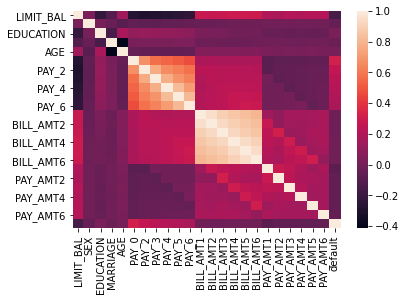

In [ ]:
sns.heatmap(defdata.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


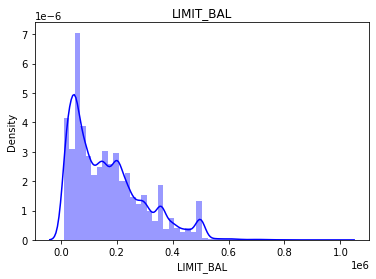

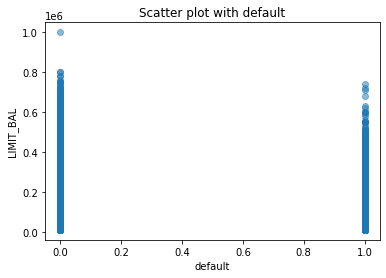

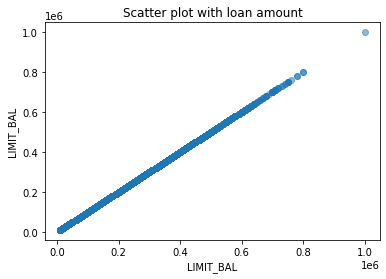

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


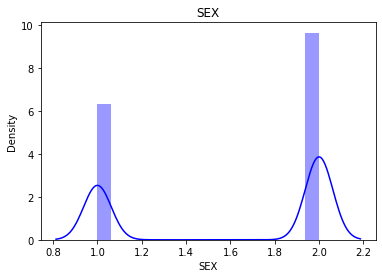

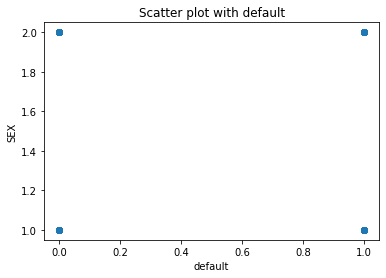

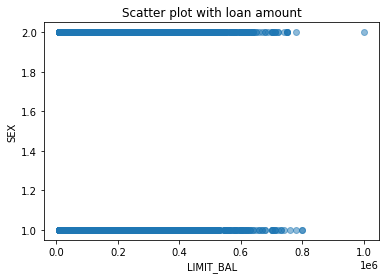

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


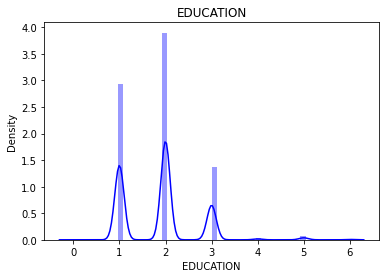

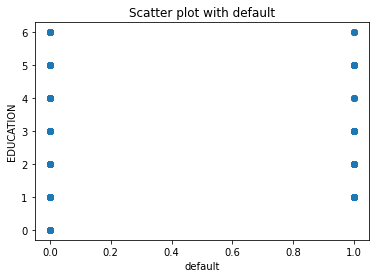

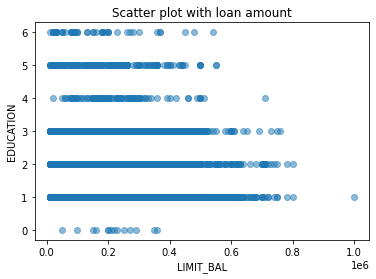

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


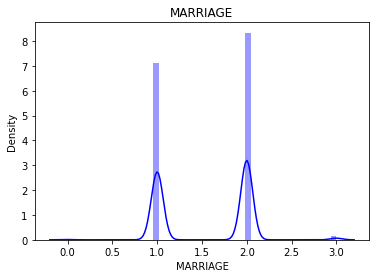

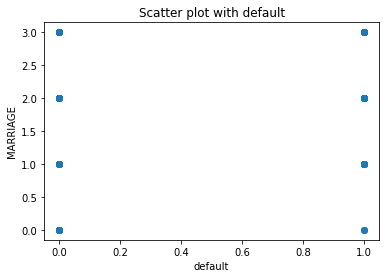

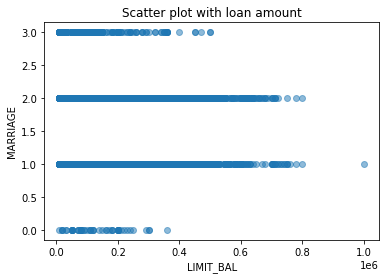

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


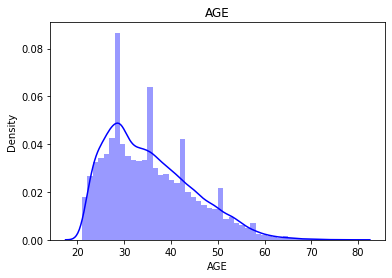

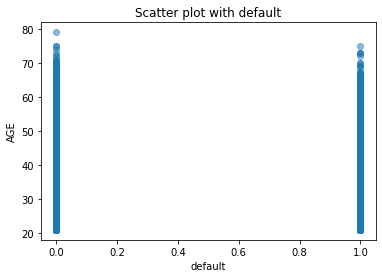

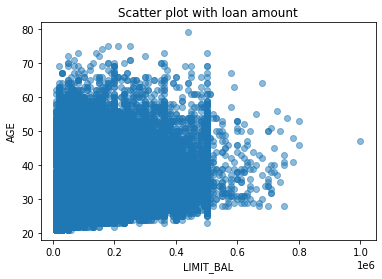

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


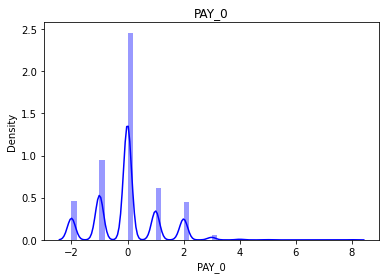

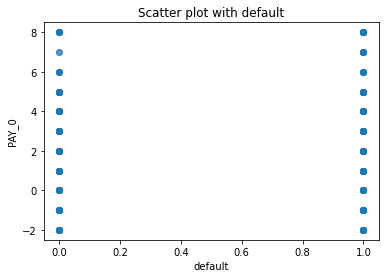

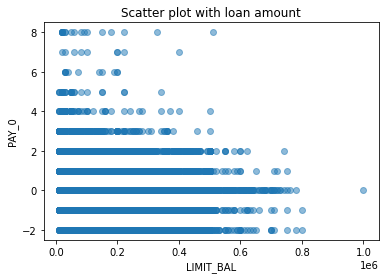

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


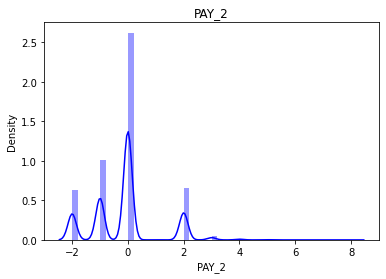

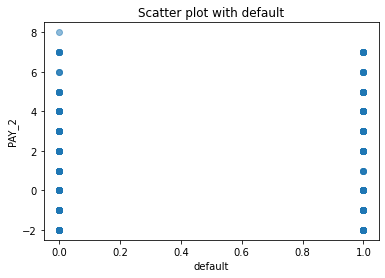

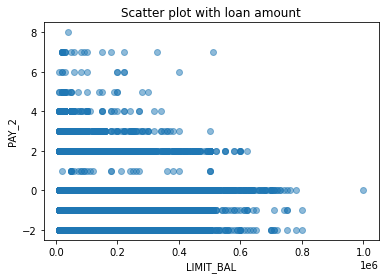

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


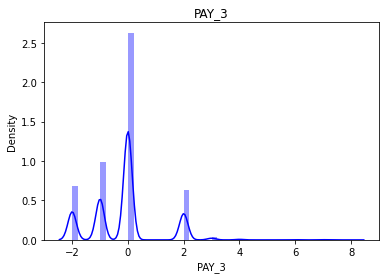

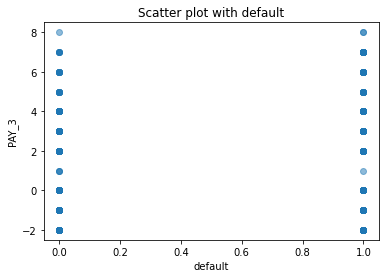

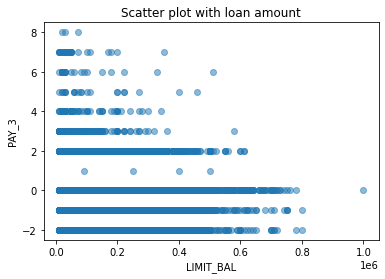

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


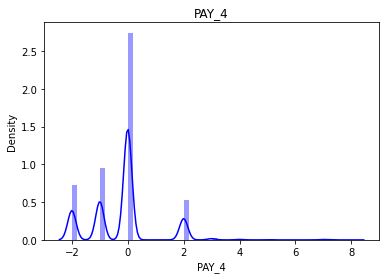

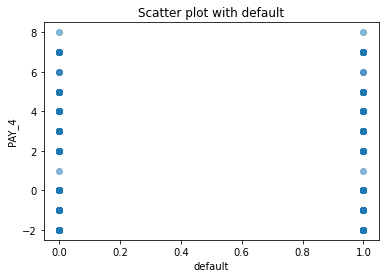

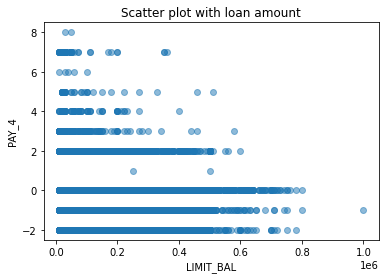

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


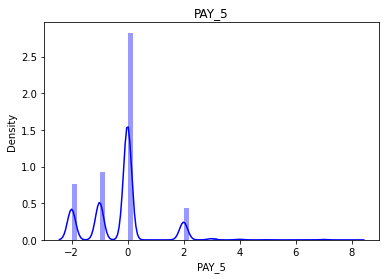

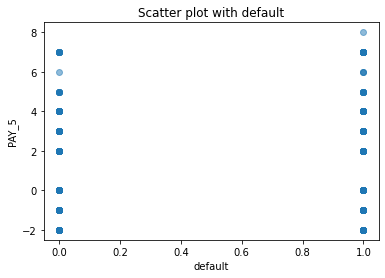

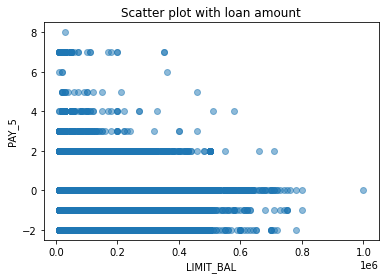

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


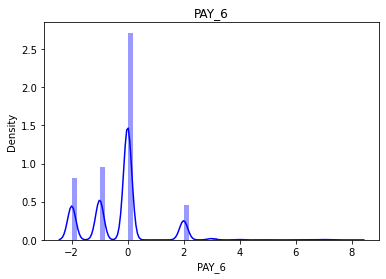

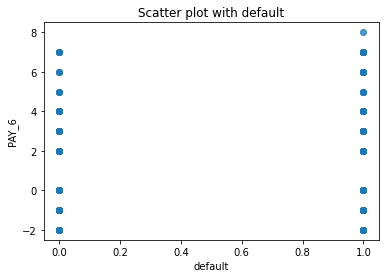

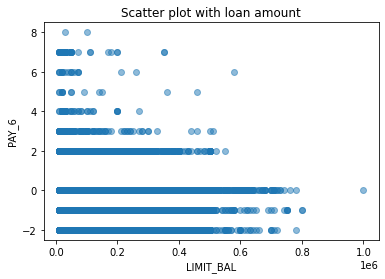

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


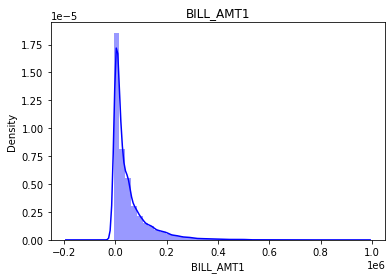

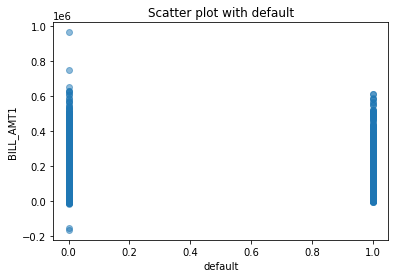

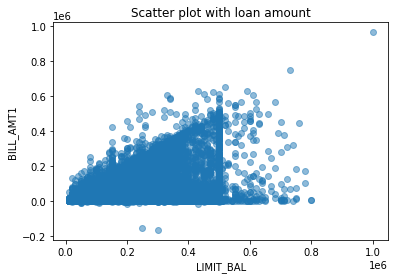

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


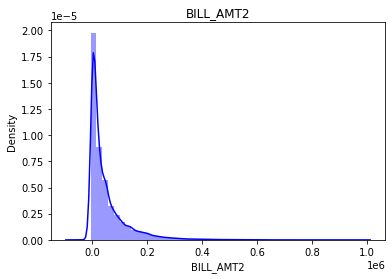

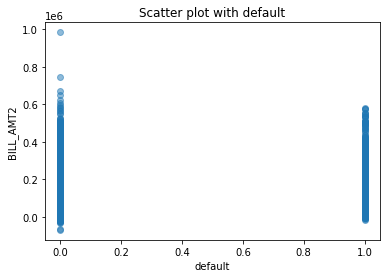

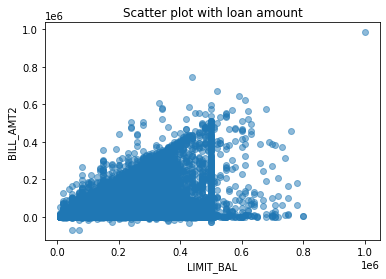

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


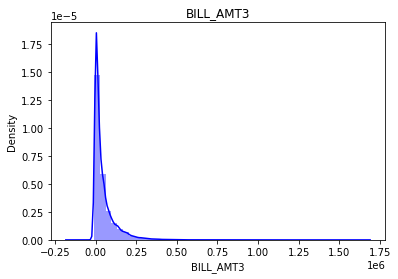

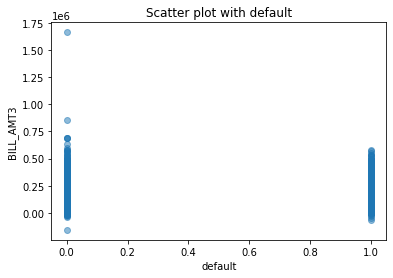

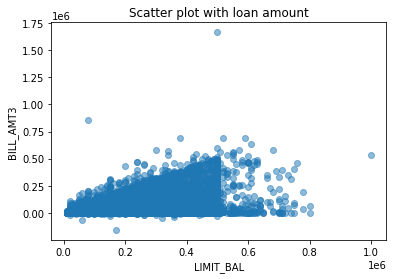

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


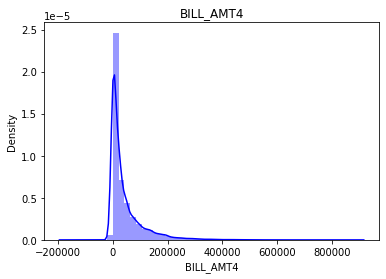

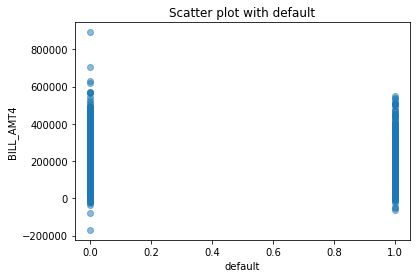

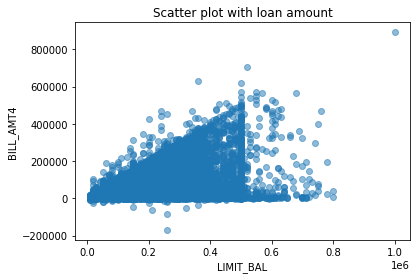

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


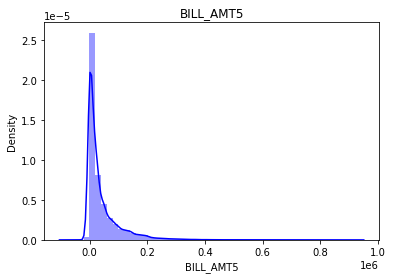

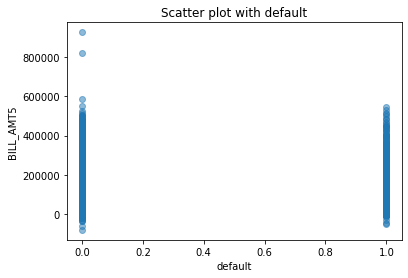

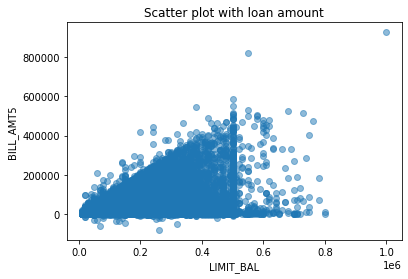

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


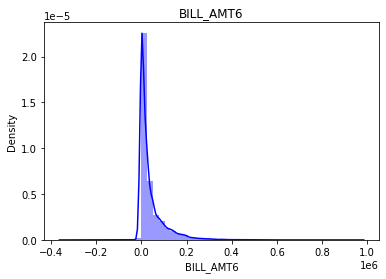

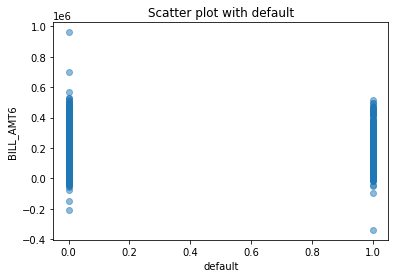

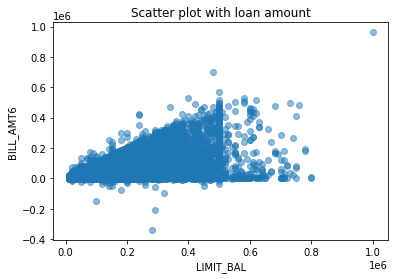

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


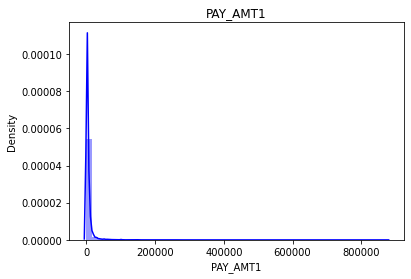

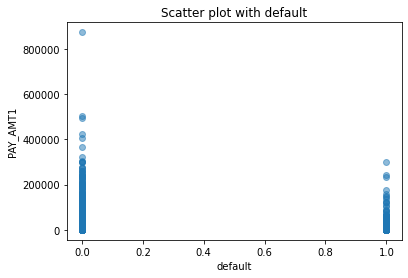

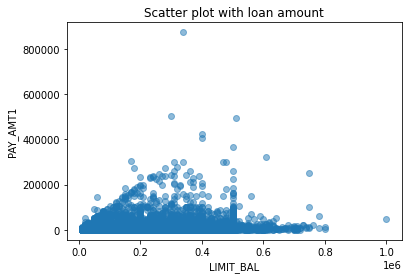

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


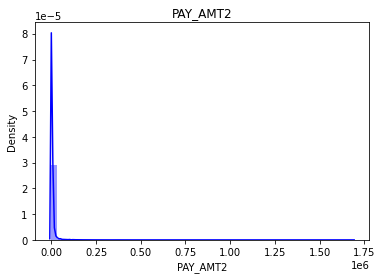

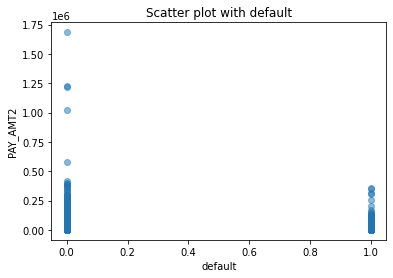

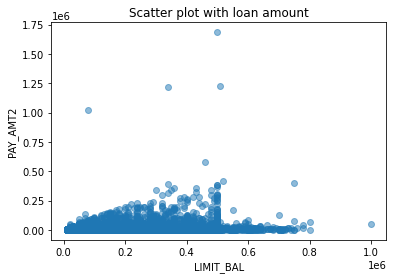

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


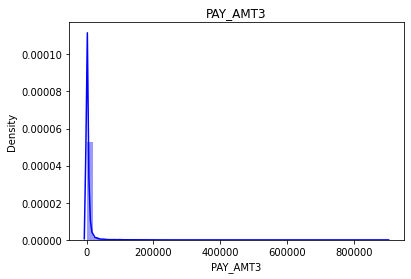

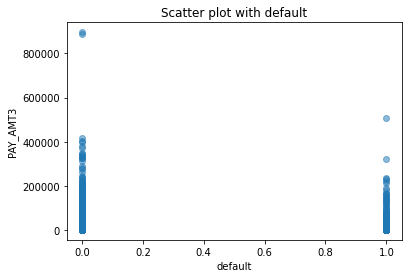

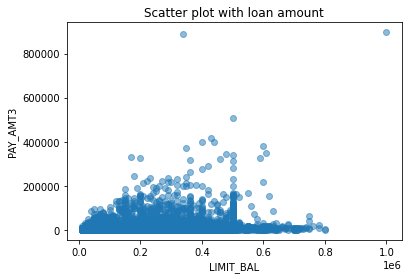

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


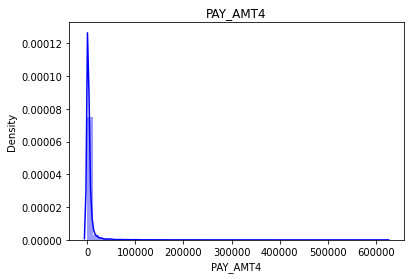

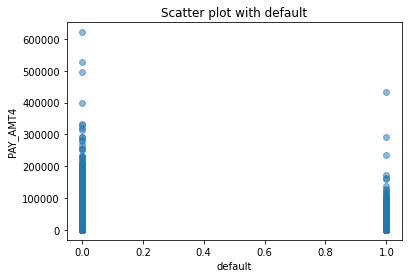

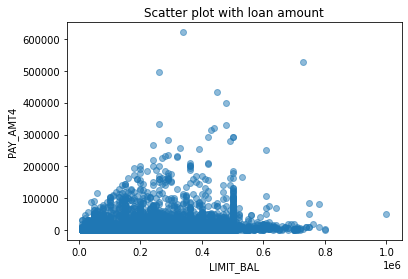

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


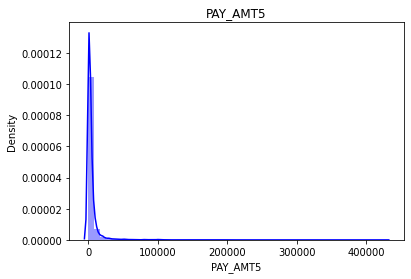

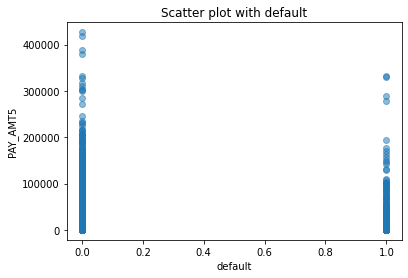

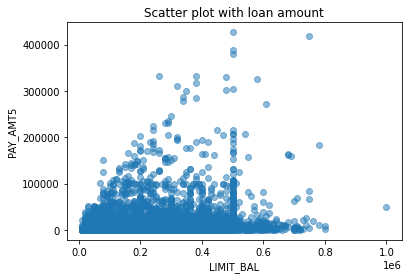

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


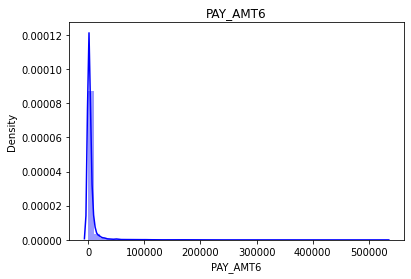

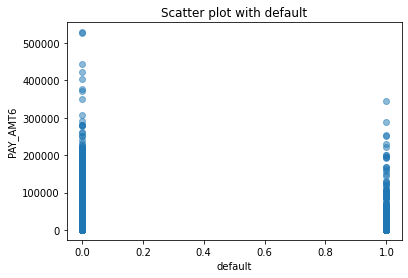

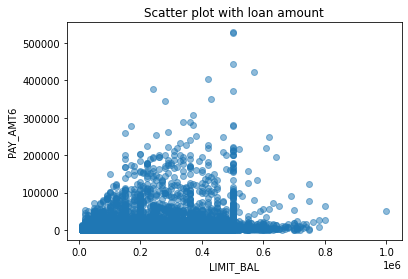

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


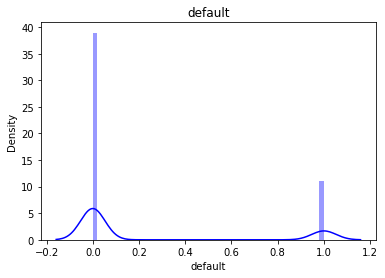

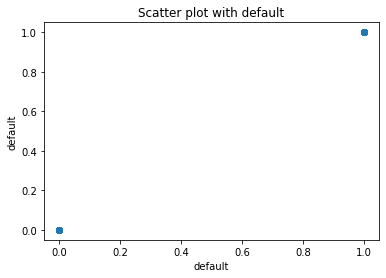

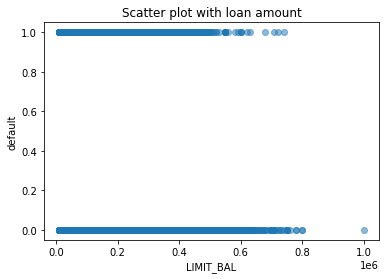

In [ ]:
for i in range(defdata.shape[1]):
  sns.distplot(defdata.iloc[:,i],color='blue')
  plt.title(defdata.columns[i])
  plt.show()
  plt.scatter(defdata.iloc[:,-1],defdata.iloc[:,i], alpha=0.5)
  plt.title('Scatter plot with default')
  plt.xlabel(defdata.columns[-1])
  plt.ylabel(defdata.columns[i])
  plt.show()
  plt.scatter(defdata.iloc[:,0],defdata.iloc[:,i], alpha=0.5)
  plt.title('Scatter plot with loan amount')
  plt.xlabel(defdata.columns[0])
  plt.ylabel(defdata.columns[i])
  plt.show()
  

###### Preprocessing

In [ ]:
for i in range(11,defdata.shape[1]-1):
  defdata.iloc[:,i]=defdata.iloc[:,i]/defdata.iloc[:,0]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


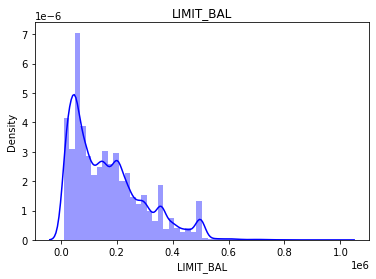

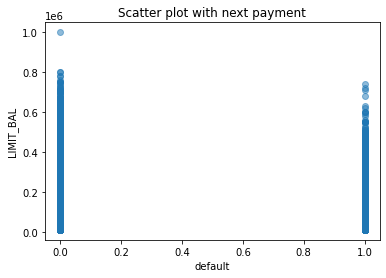

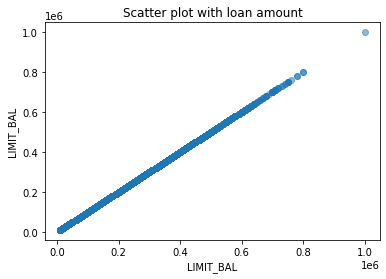

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


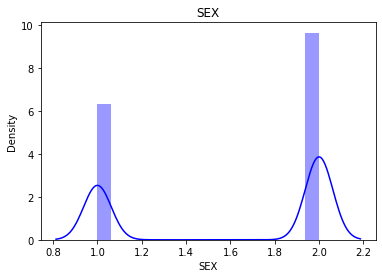

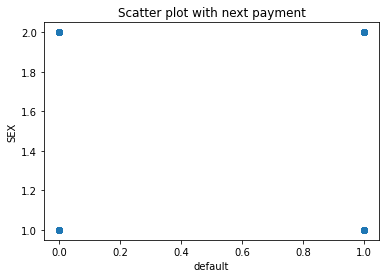

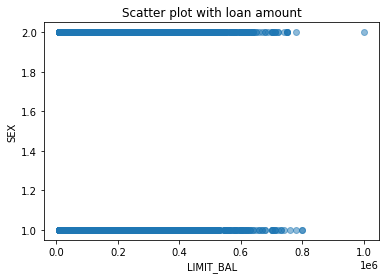

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


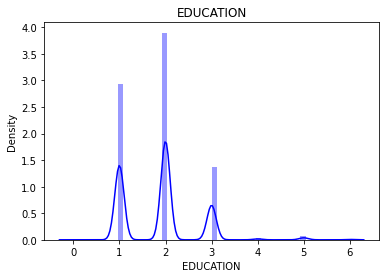

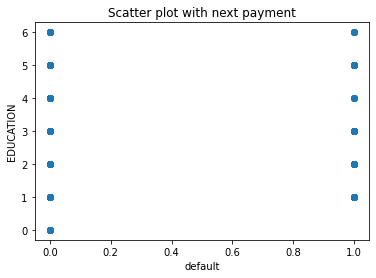

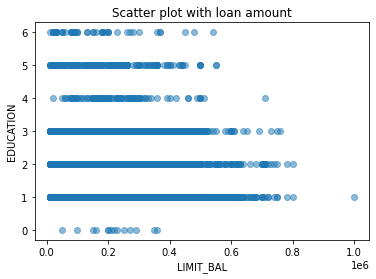

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


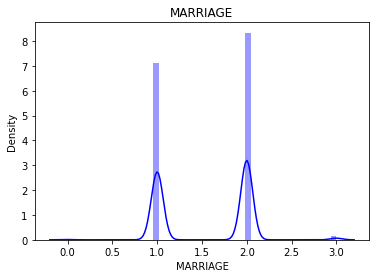

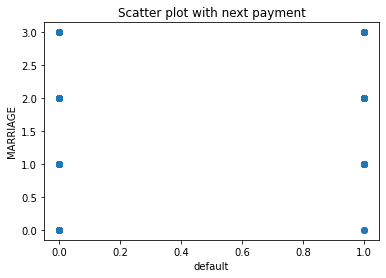

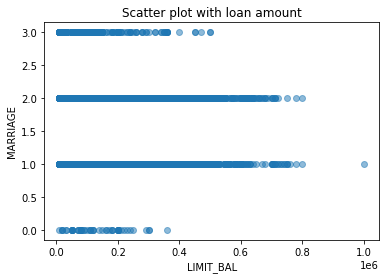

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


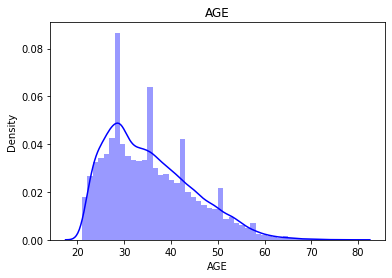

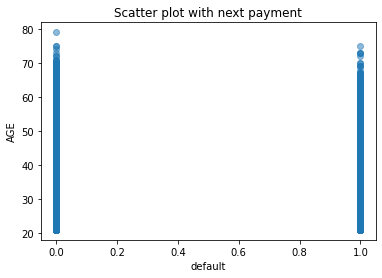

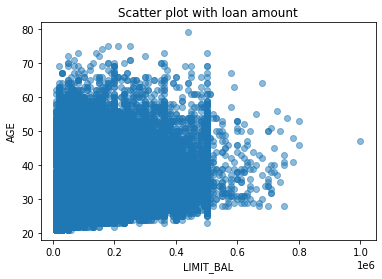

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


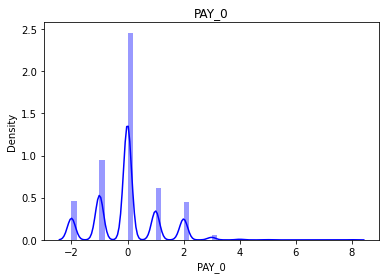

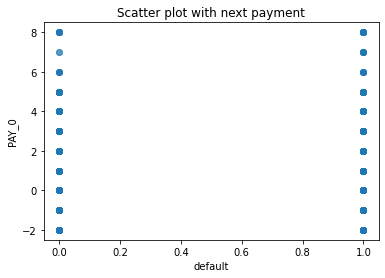

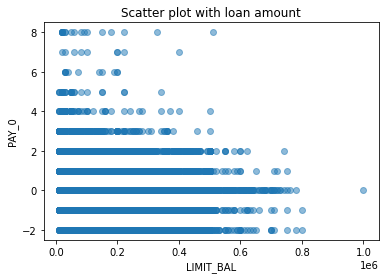

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


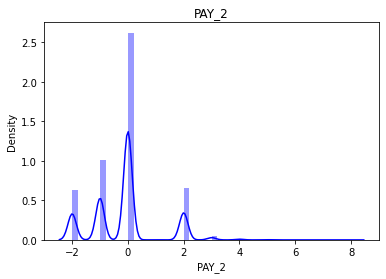

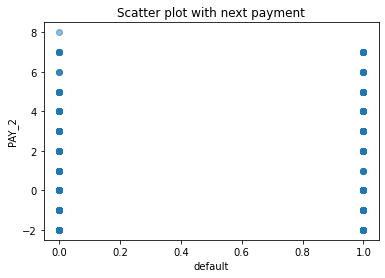

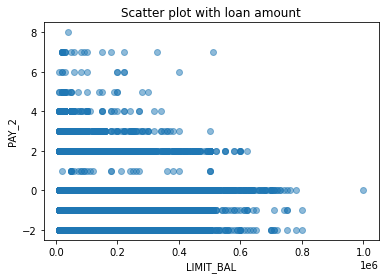

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


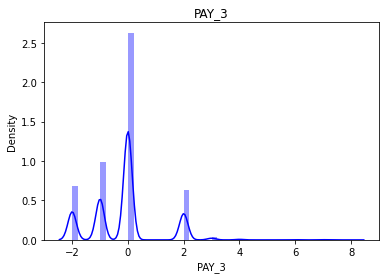

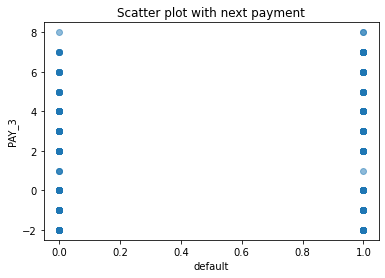

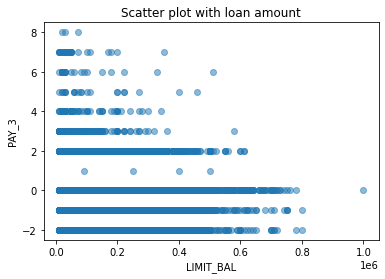

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


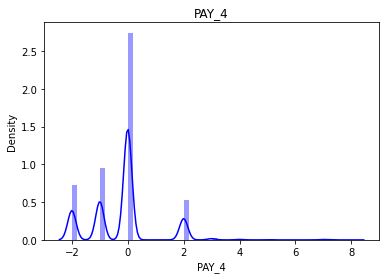

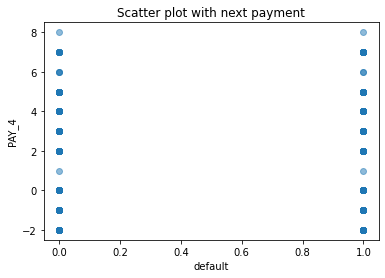

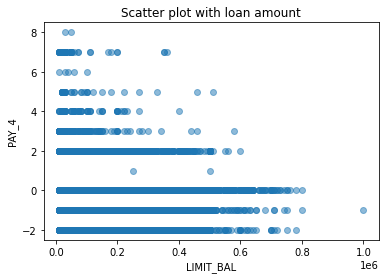

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


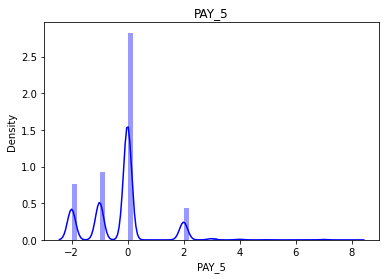

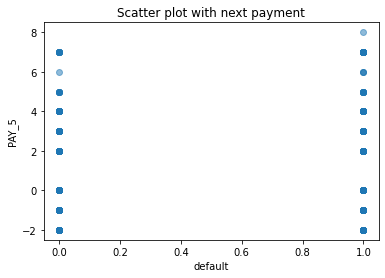

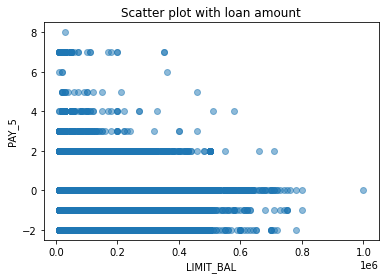

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


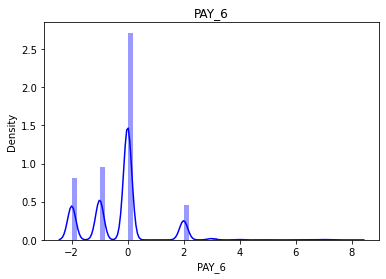

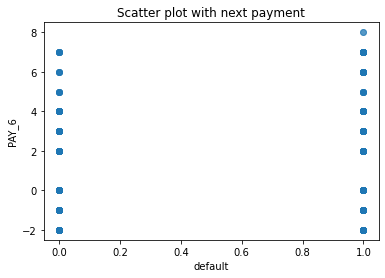

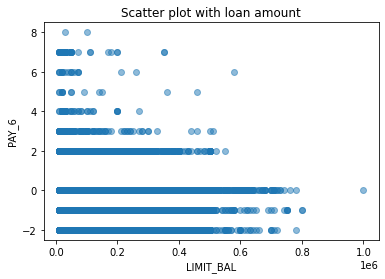

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


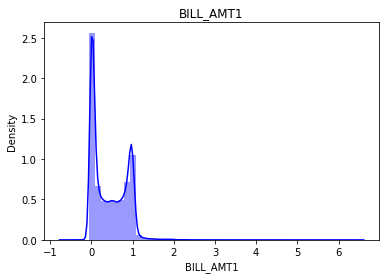

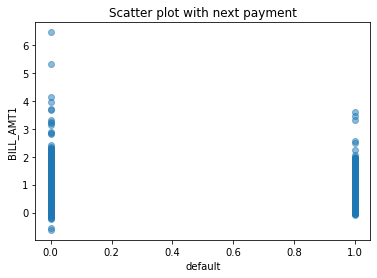

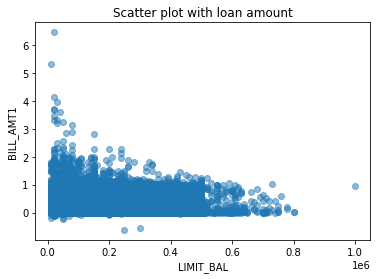

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


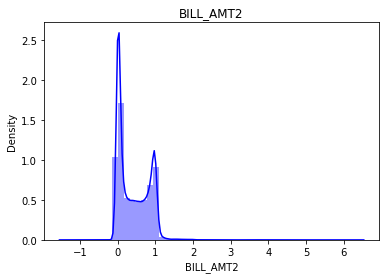

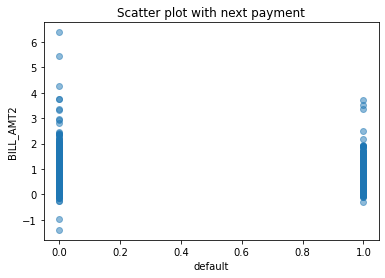

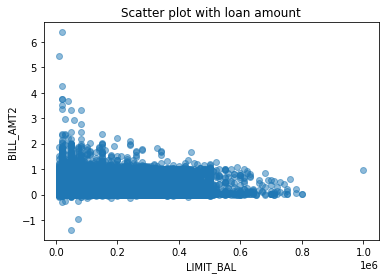

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


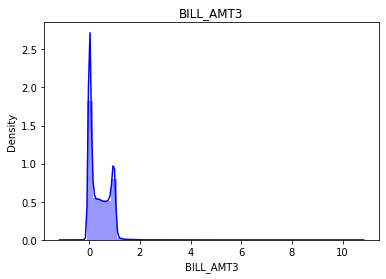

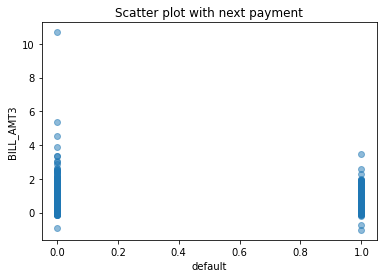

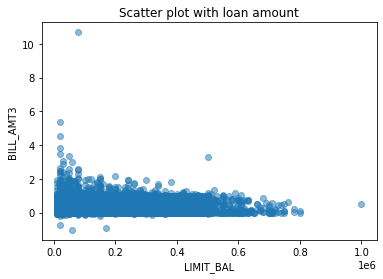

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


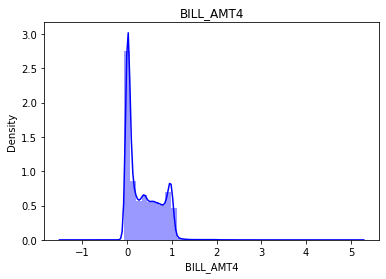

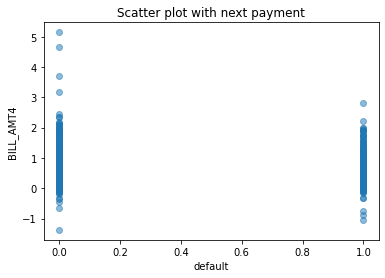

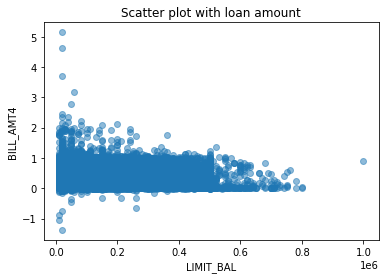

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


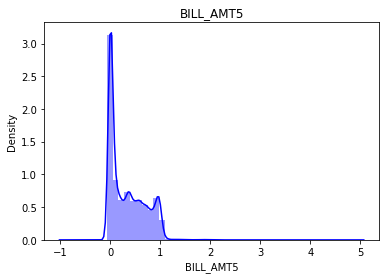

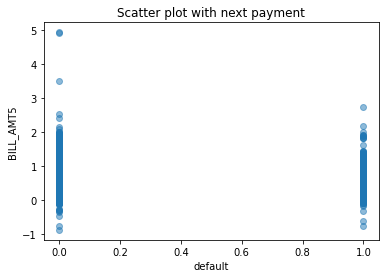

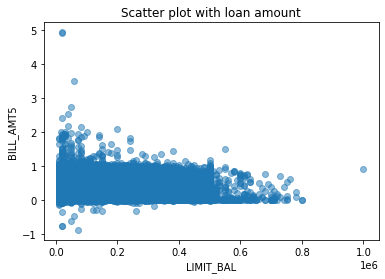

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


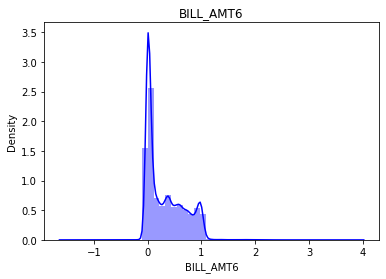

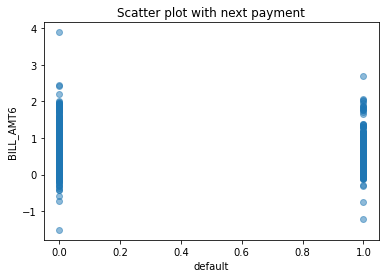

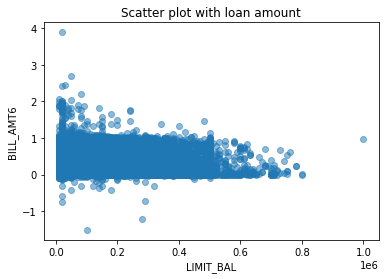

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


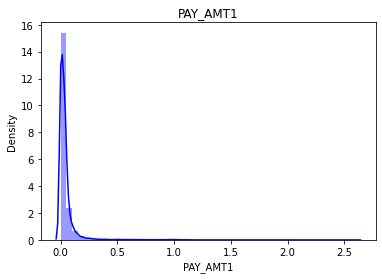

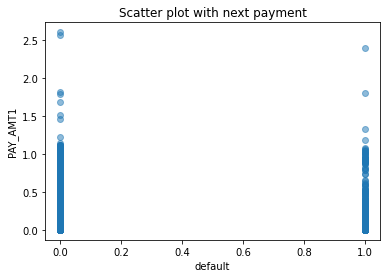

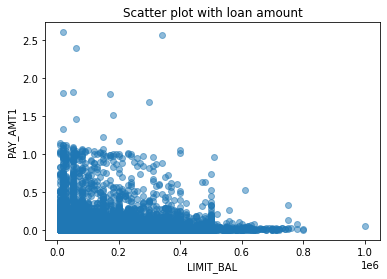

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


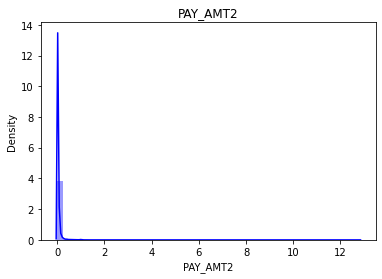

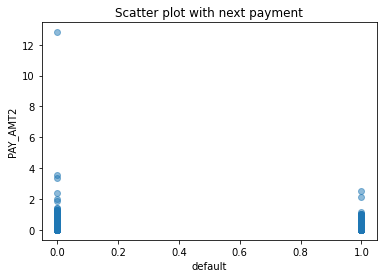

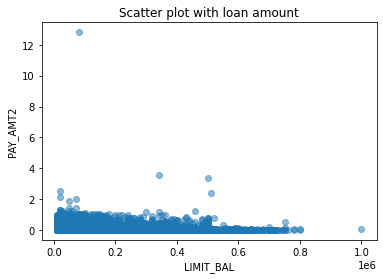

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


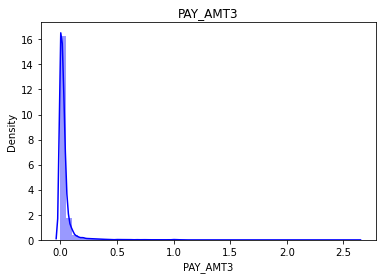

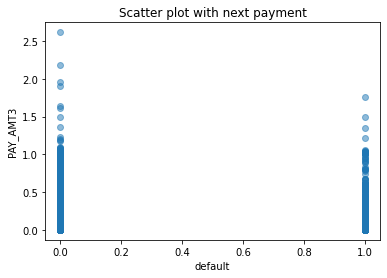

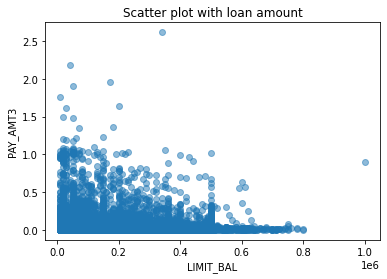

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


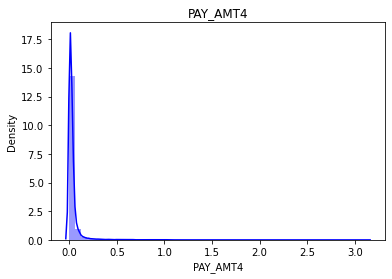

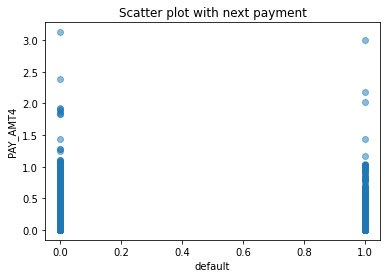

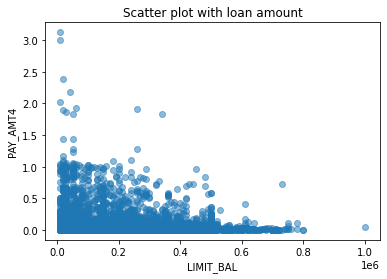

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


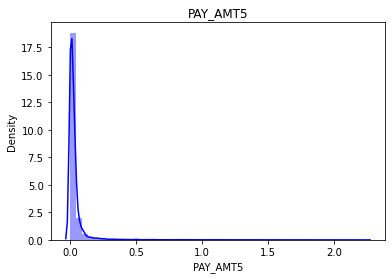

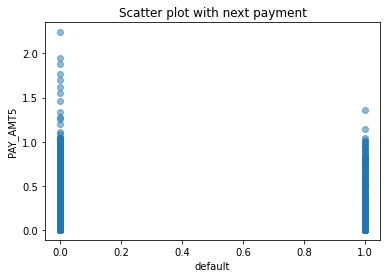

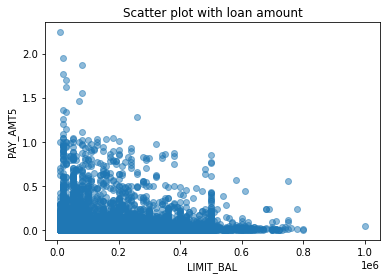

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


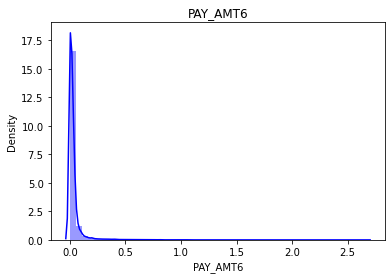

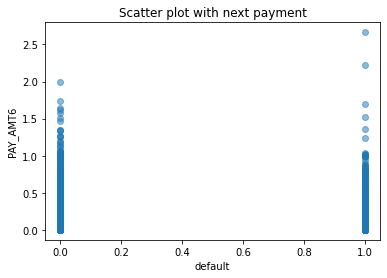

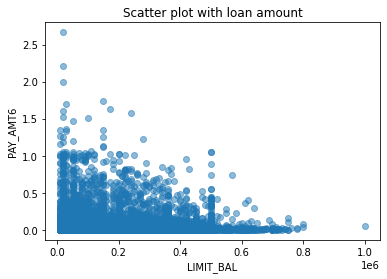

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


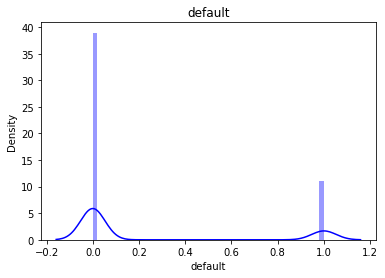

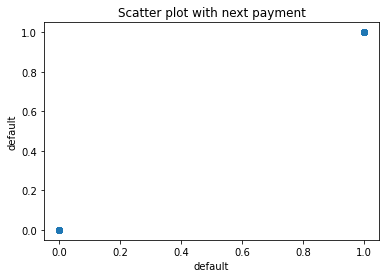

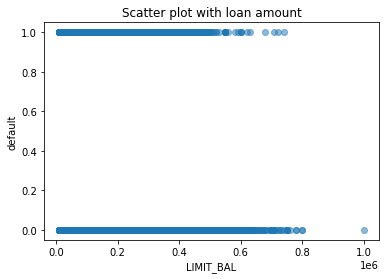

In [ ]:
for i in range(defdata.shape[1]):
  sns.distplot(defdata.iloc[:,i],color='blue')
  plt.title(defdata.columns[i])
  plt.show()
  plt.scatter(defdata.iloc[:,-1],defdata.iloc[:,i], alpha=0.5)
  plt.title('Scatter plot with next payment')
  plt.xlabel(defdata.columns[-1])
  plt.ylabel(defdata.columns[i])
  plt.show()
  plt.scatter(defdata.iloc[:,0],defdata.iloc[:,i], alpha=0.5)
  plt.title('Scatter plot with loan amount')
  plt.xlabel(defdata.columns[0])
  plt.ylabel(defdata.columns[i])
  plt.show()

In [ ]:
pd.get_dummies(defdata.SEX,prefix='SEX').iloc[:, 1:]

,SEX_2
ID,
1,1
2,1
3,1
4,1
5,0
...,...
29996,0
29997,0
29998,0


In [ ]:
pd.get_dummies(defdata.EDUCATION,prefix='EDUCATION').iloc[:, 1:]

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
ID,,,,,,
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
...,...,...,...,...,...,...
29996,0,0,1,0,0,0
29997,0,0,1,0,0,0
29998,0,1,0,0,0,0


In [ ]:
pd.get_dummies(defdata.MARRIAGE,prefix='MARRIAGE').iloc[:, 1:]

,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
5,1,0,0
...,...,...,...
29996,1,0,0
29997,0,1,0
29998,0,1,0


In [ ]:
defdata=pd.concat([defdata.iloc[:,:-2], pd.get_dummies(defdata.MARRIAGE,prefix='SEX').iloc[:, 1:],pd.get_dummies(defdata.MARRIAGE,prefix='EDUCATION').iloc[:, 1:],pd.get_dummies(defdata.MARRIAGE,prefix='MARRIAGE').iloc[:, 1:],defdata.iloc[:,-1]], axis=1)

In [ ]:
defdata=defdata.drop(['SEX', 'EDUCATION','MARRIAGE'], axis=1)

In [ ]:
defdata.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,SEX_1,SEX_2,SEX_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.000000,0.034450,0.000000,0.000000,0.000000,1,0,0,1,0,0,1,0,0,1
2,120000,26,-1,2,0,0,0,2,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.000000,0.008333,0.008333,0.008333,0.000000,0,1,0,0,1,0,0,1,0,1
3,90000,34,0,0,0,0,0,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.016867,0.016667,0.011111,0.011111,0.011111,0,1,0,0,1,0,0,1,0,0
4,50000,37,0,0,0,0,0,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.040000,0.040380,0.024000,0.022000,0.021380,1,0,0,1,0,0,1,0,0,0
5,50000,57,-1,0,-1,0,0,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.040000,0.733620,0.200000,0.180000,0.013780,1,0,0,1,0,0,1,0,0,0


In [ ]:
defdatanp=defdata.to_numpy()

## Housing dataset

In [ ]:
housingdata = datasets.load_boston()

In [ ]:
housingdata.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

###### Attribute Information

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000 dollars

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000’s

###### Exploratory Data Analysis

In [ ]:
housingdatadf=pd.concat([pd.DataFrame(housingdata.data,columns=housingdata.feature_names),pd.DataFrame(housingdata.target,columns=['PRICE'])],axis=1)

In [ ]:
housingdatadf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
housingdatadf.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
housingdatadf.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


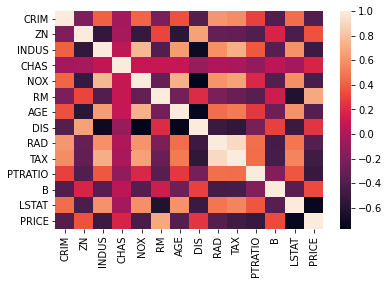

In [ ]:
sns.heatmap(housingdatadf.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


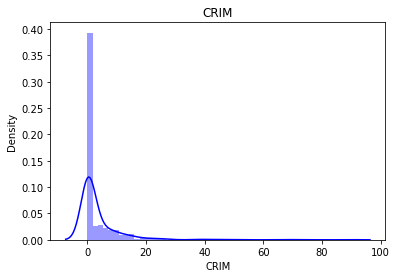

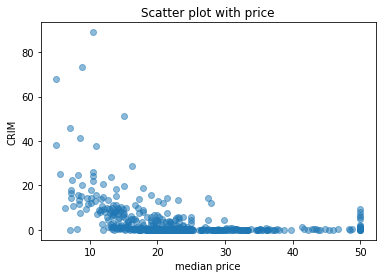

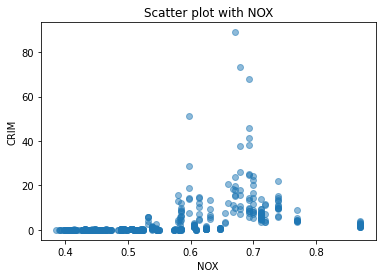

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


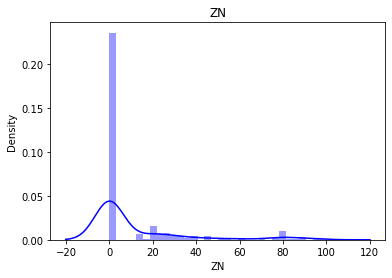

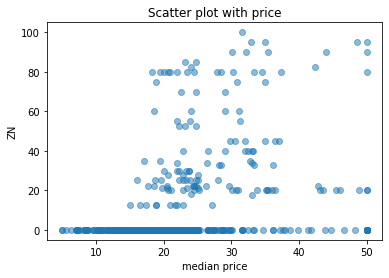

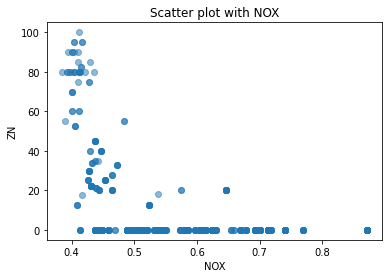

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


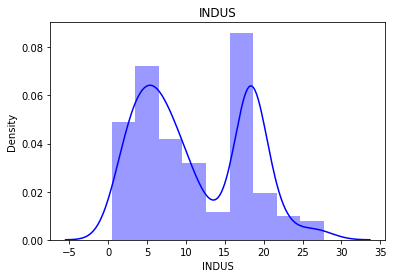

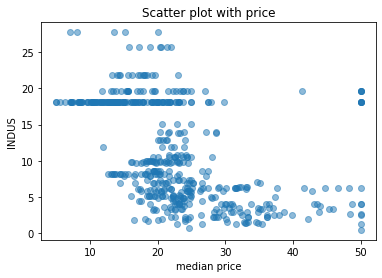

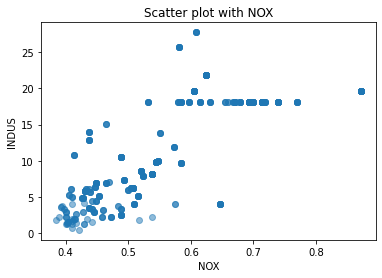

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


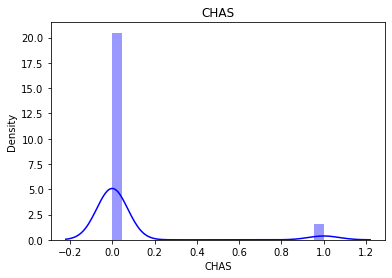

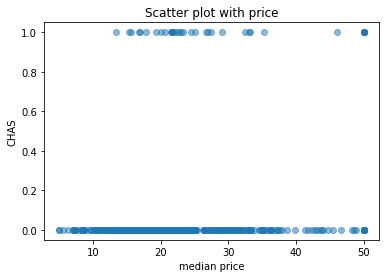

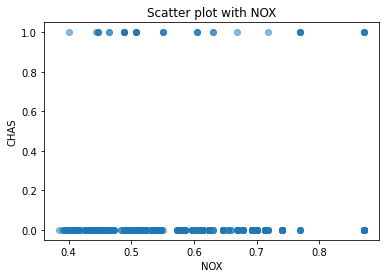

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


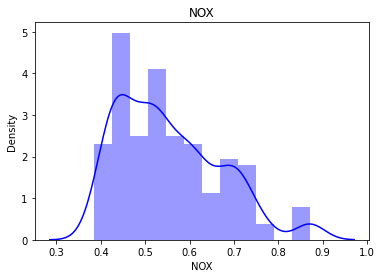

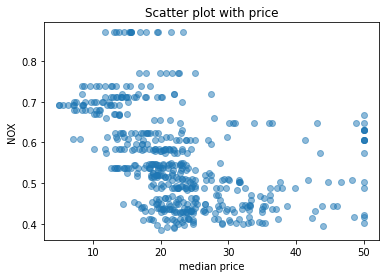

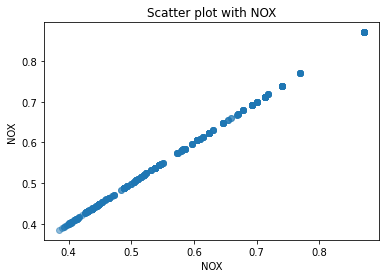

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


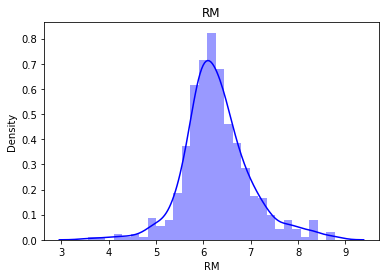

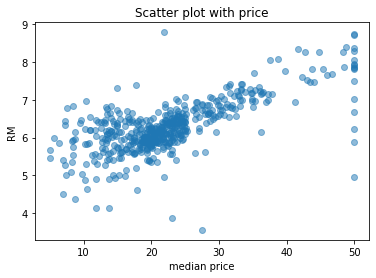

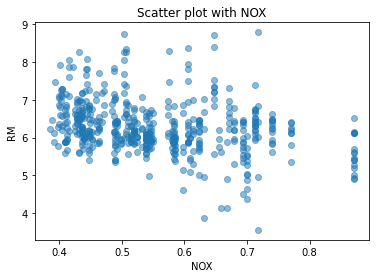

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


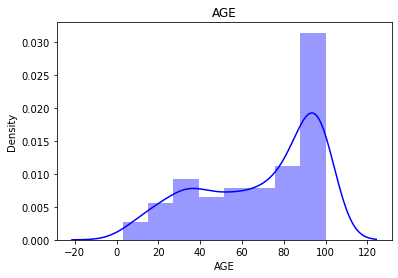

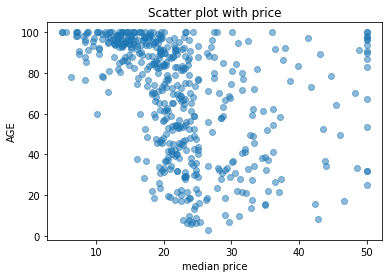

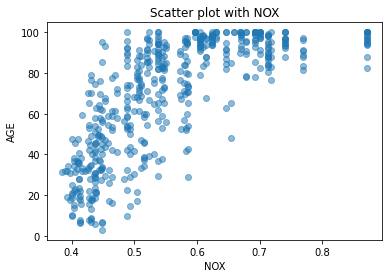

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


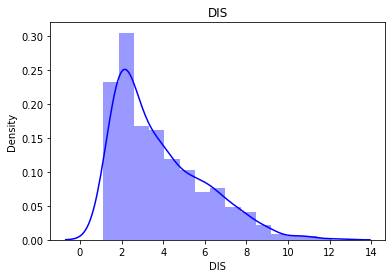

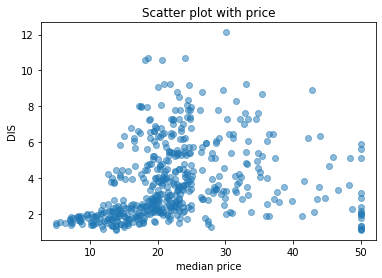

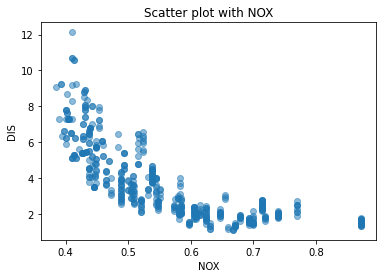

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


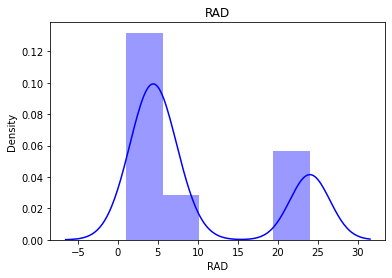

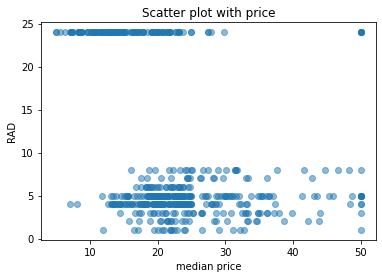

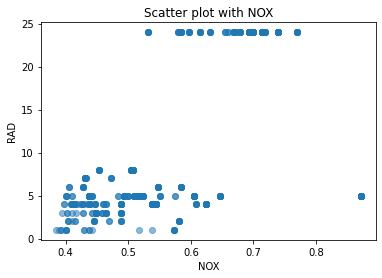

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


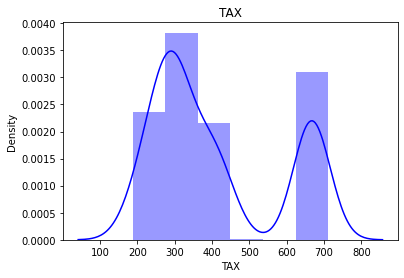

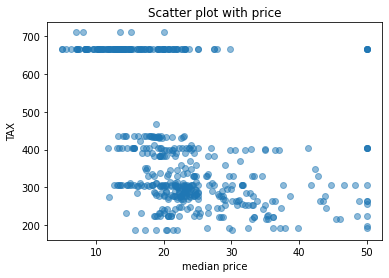

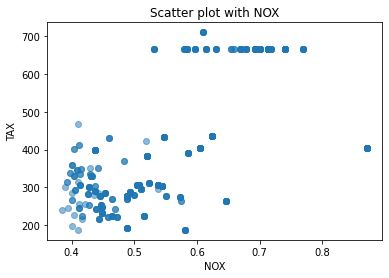

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


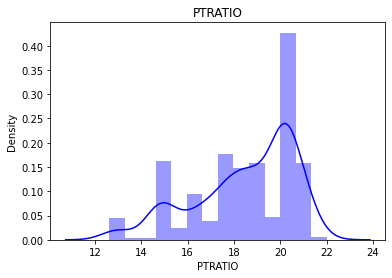

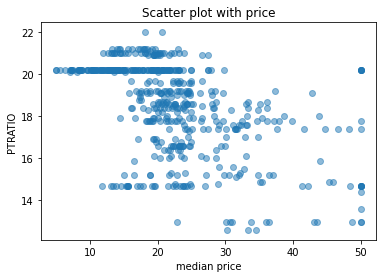

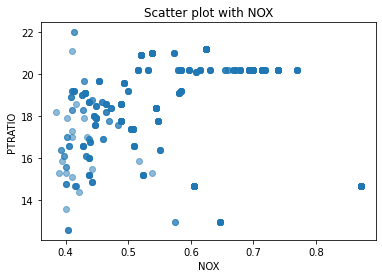

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


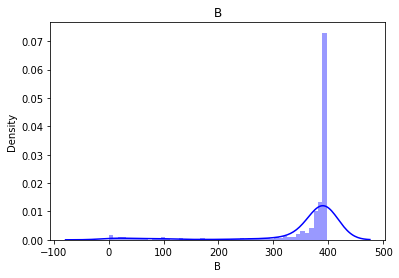

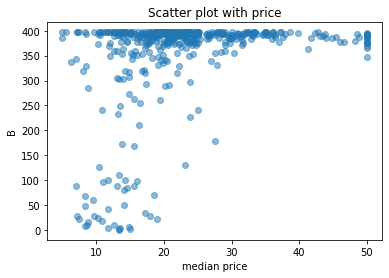

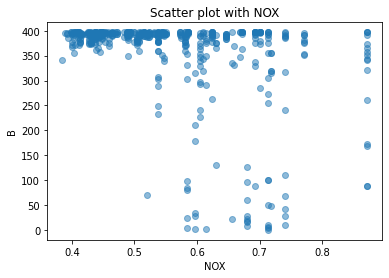

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


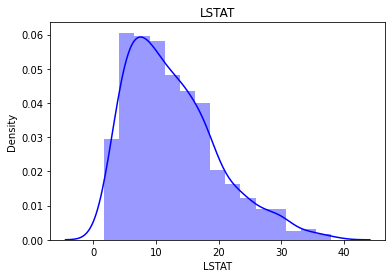

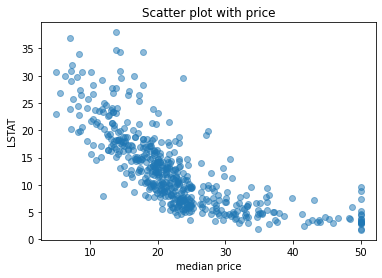

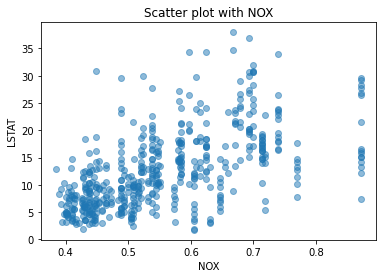

In [ ]:
for i in range(housingdatadf.shape[1]-1):
  sns.distplot(housingdatadf.iloc[:,i],color='blue')
  plt.title(housingdatadf.columns[i])
  plt.show()
  plt.scatter(housingdatadf.iloc[:,-1],housingdatadf.iloc[:,i], alpha=0.5)
  plt.title('Scatter plot with price')
  plt.xlabel('median price')
  plt.ylabel(housingdatadf.columns[i])
  plt.show()
  plt.scatter(housingdatadf.iloc[:,4],housingdatadf.iloc[:,i], alpha=0.5)
  plt.title('Scatter plot with NOX')
  plt.xlabel('NOX')
  plt.ylabel(housingdatadf.columns[i])
  plt.show()
  

# Supervised Learning

## Regression

### Linear regression

source: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py

Automatically created module for IPython interactive environment
Coefficients: 
 [-1.01170421  1.02558108 -0.03953238  0.60731239 -1.80467996  2.64552328
 -0.19783648 -3.018615    2.0883816  -1.90212879 -2.13154559  0.77017134
 -3.56070005]
Mean squared error: 29.78
Coefficient of determination: 0.64


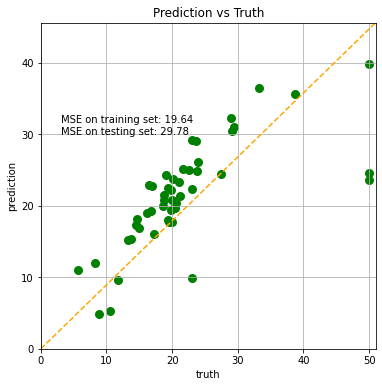

         Coefficients
CRIM        -1.011704
ZN           1.025581
INDUS       -0.039532
CHAS         0.607312
NOX         -1.804680
RM           2.645523
AGE         -0.197836
DIS         -3.018615
RAD          2.088382
TAX         -1.902129
PTRATIO     -2.131546
B            0.770171
LSTAT       -3.560700


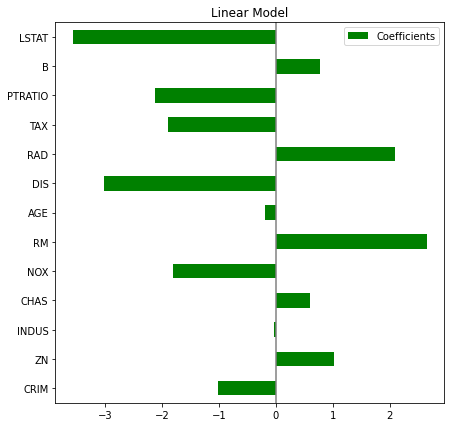

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test[:50], y_test[:50],  color='black')

y_pred = regr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
string_score = f'MSE on training set: {mse:.2f}'
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
string_score += f'\nMSE on testing set: {mse:.2f}'


fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(y_test[:50], y_pred[:50], color='green', linewidth=3)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="orange")
plt.text(3, 30, string_score)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('prediction')
plt.xlabel('truth')
plt.title('Prediction vs Truth')

plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_pred)+1])
plt.grid(True)


plt.show()

coefs=pd.DataFrame(regr.coef_,columns=['Coefficients'],index=housingdata.feature_names)

print(coefs)

coefs.plot(kind='barh', figsize=(9, 7),color='green')
plt.title('Linear Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

coefs_lr=coefs

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
data_X, data_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Ridge Regression

source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Automatically created module for IPython interactive environment
Coefficients: 
 [-0.96670385  0.94348215 -0.15466936  0.62458807 -1.64200038  2.68950432
 -0.22334411 -2.84094178  1.74462929 -1.59418499 -2.09629774  0.76823079
 -3.48542017]
Mean squared error: 30.13
Coefficient of determination: 0.63


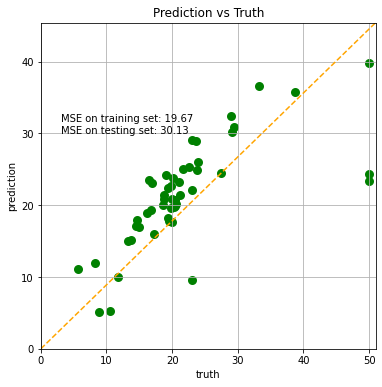

         Coefficients
CRIM        -0.966704
ZN           0.943482
INDUS       -0.154669
CHAS         0.624588
NOX         -1.642000
RM           2.689504
AGE         -0.223344
DIS         -2.840942
RAD          1.744629
TAX         -1.594185
PTRATIO     -2.096298
B            0.768231
LSTAT       -3.485420


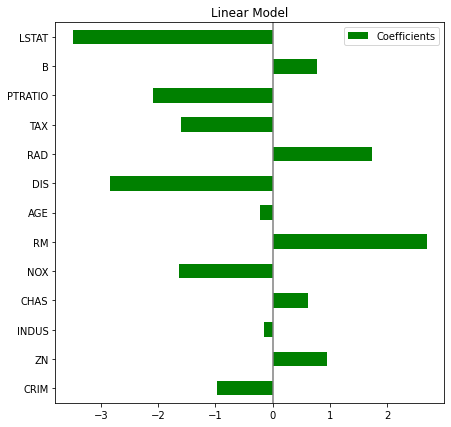

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr = linear_model.Ridge(alpha=5.0)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test[:50], y_test[:50],  color='black')

y_pred = regr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
string_score = f'MSE on training set: {mse:.2f}'
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
string_score += f'\nMSE on testing set: {mse:.2f}'


fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(y_test[:50], y_pred[:50], color='green', linewidth=3)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="orange")
plt.text(3, 30, string_score)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('prediction')
plt.xlabel('truth')
plt.title('Prediction vs Truth')

plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_pred)+1])
plt.grid(True)


plt.show()

coefs=pd.DataFrame(regr.coef_,columns=['Coefficients'],index=housingdata.feature_names)

print(coefs)

coefs.plot(kind='barh', figsize=(9, 7),color='green')
plt.title('Linear Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

coefs_ridge=coefs

### Lasso Regression

Automatically created module for IPython interactive environment
Coefficients: 
 [-0.          0.         -0.          0.         -0.          2.5260289
 -0.         -0.         -0.         -0.24639116 -1.69060341  0.09119321
 -3.60718442]
Mean squared error: 35.64
Coefficient of determination: 0.56


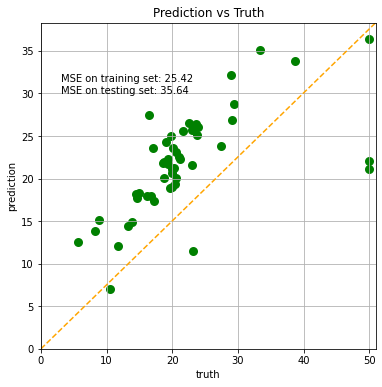

         Coefficients
CRIM        -0.000000
ZN           0.000000
INDUS       -0.000000
CHAS         0.000000
NOX         -0.000000
RM           2.526029
AGE         -0.000000
DIS         -0.000000
RAD         -0.000000
TAX         -0.246391
PTRATIO     -1.690603
B            0.091193
LSTAT       -3.607184


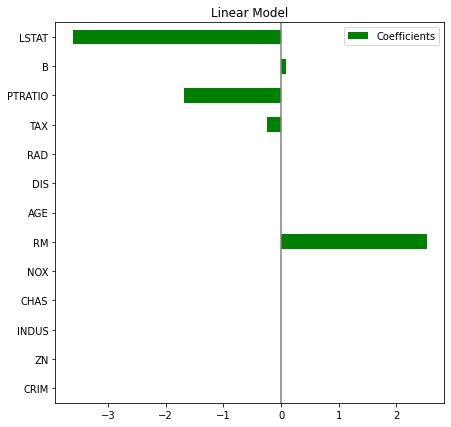

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr = linear_model.Lasso()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test[:50], y_test[:50],  color='black')

y_pred = regr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
string_score = f'MSE on training set: {mse:.2f}'
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
string_score += f'\nMSE on testing set: {mse:.2f}'


fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(y_test[:50], y_pred[:50], color='green', linewidth=3)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="orange")
plt.text(3, 30, string_score)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('prediction')
plt.xlabel('truth')
plt.title('Prediction vs Truth')

plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_pred)+1])
plt.grid(True)


plt.show()

coefs=pd.DataFrame(regr.coef_,columns=['Coefficients'],index=housingdata.feature_names)

print(coefs)

coefs.plot(kind='barh', figsize=(9, 7),color='green')
plt.title('Linear Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

coefs_lasso=coefs

### ElasticNet Regression

Automatically created module for IPython interactive environment
Coefficients: 
 [-0.40906701  0.13820553 -0.39447249  0.31224726 -0.23389008  2.27785365
 -0.         -0.         -0.         -0.48239158 -1.49853462  0.45826038
 -2.28987413]
Mean squared error: 38.11
Coefficient of determination: 0.53


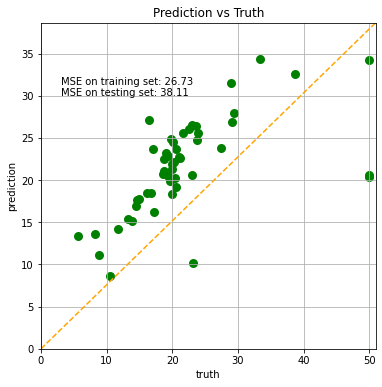

         Coefficients
CRIM        -0.409067
ZN           0.138206
INDUS       -0.394472
CHAS         0.312247
NOX         -0.233890
RM           2.277854
AGE         -0.000000
DIS         -0.000000
RAD         -0.000000
TAX         -0.482392
PTRATIO     -1.498535
B            0.458260
LSTAT       -2.289874


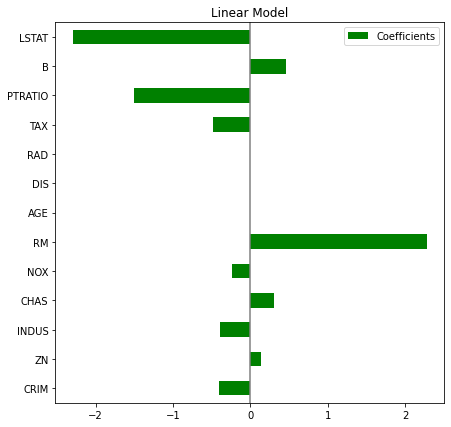

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr = linear_model.ElasticNet()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test[:50], y_test[:50],  color='black')

y_pred = regr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
string_score = f'MSE on training set: {mse:.2f}'
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
string_score += f'\nMSE on testing set: {mse:.2f}'


fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(y_test[:50], y_pred[:50], color='green', linewidth=3)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="orange")
plt.text(3, 30, string_score)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('prediction')
plt.xlabel('truth')
plt.title('Prediction vs Truth')

plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_pred)+1])
plt.grid(True)


plt.show()

coefs=pd.DataFrame(regr.coef_,columns=['Coefficients'],index=housingdata.feature_names)

print(coefs)

coefs.plot(kind='barh', figsize=(9, 7),color='green')
plt.title('Linear Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

coefs_elasticnet=coefs

### Coefficient Comparison

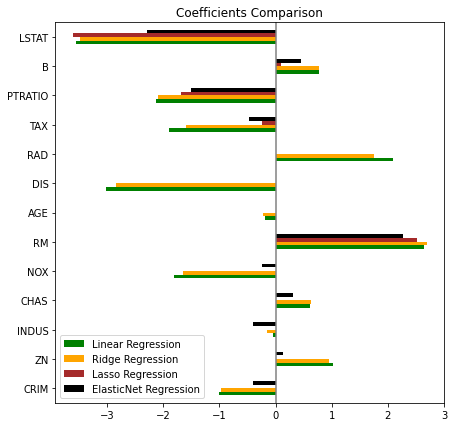

In [ ]:
coeftable=pd.concat([coefs_lr,coefs_ridge,coefs_lasso,coefs_elasticnet],axis=1)
coeftable.columns=['Linear Regression', 'Ridge Regression','Lasso Regression','ElasticNet Regression']
coeftable.plot(kind='barh', figsize=(9, 7),color=['green','orange','brown','black'])
plt.title('Coefficients Comparison')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

### Bayesian Regression

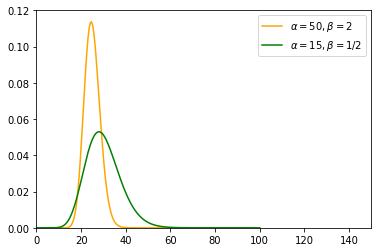

In [ ]:
import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt

x1 = np.linspace (0, 100, 200)
x2 = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x1, a=50, scale=1/2) #a is alpha, loc is beta???
plt.plot(x1, y1, "orange", label=(r'$\alpha=50, \beta=2$')) 
y2 = stats.gamma.pdf(x2, a=15, scale=2) #a is alpha, loc is beta???
plt.plot(x2, y2, "g", label=(r'$\alpha=15, \beta=1/2$')) 
plt.legend()
plt.ylim([0,0.12])
plt.xlim([0,150])
plt.show()

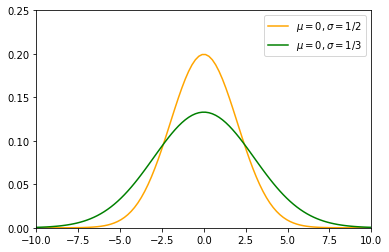

In [ ]:
import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt

x1 = np.linspace (-10, 10, 100)
x2 = np.linspace (-10, 10, 100) 
y1 = stats.norm.pdf(x1, loc=0, scale=2) #a is alpha, loc is beta???
plt.plot(x1, y1, "orange", label=(r'$\mu=0, \sigma=1/2$')) 
y2 = stats.norm.pdf(x2, loc=0, scale=3) #a is alpha, loc is beta???
plt.plot(x2, y2, "g", label=(r'$\mu=0, \sigma=1/3$')) 
plt.legend()
plt.ylim([0,0.25])
plt.xlim([-10,10])
plt.show()

source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

Automatically created module for IPython interactive environment
Coefficients: 
 [-0.95946804  0.93027922 -0.17172992  0.62714173 -1.61504293  2.69616917
 -0.22714969 -2.81006533  1.69190017 -1.54846985 -2.09036153  0.76795559
 -3.47211983]
Mean squared error: 30.19
Coefficient of determination: 0.63


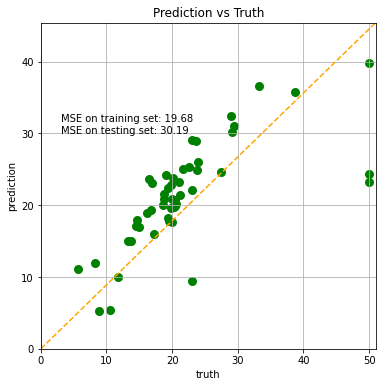

         Coefficients
CRIM        -0.959468
ZN           0.930279
INDUS       -0.171730
CHAS         0.627142
NOX         -1.615043
RM           2.696169
AGE         -0.227150
DIS         -2.810065
RAD          1.691900
TAX         -1.548470
PTRATIO     -2.090362
B            0.767956
LSTAT       -3.472120


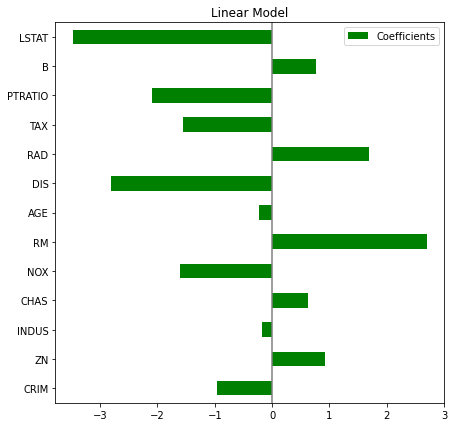

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr = linear_model.BayesianRidge()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test[:50], y_test[:50],  color='black')

y_pred = regr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
string_score = f'MSE on training set: {mse:.2f}'
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
string_score += f'\nMSE on testing set: {mse:.2f}'


fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(y_test[:50], y_pred[:50], color='green', linewidth=3)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="orange")
plt.text(3, 30, string_score)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('prediction')
plt.xlabel('truth')
plt.title('Prediction vs Truth')

plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_pred)+1])
plt.grid(True)


plt.show()

coefs=pd.DataFrame(regr.coef_,columns=['Coefficients'],index=housingdata.feature_names)

print(coefs)

coefs.plot(kind='barh', figsize=(9, 7),color='green')
plt.title('Linear Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

coefs_bayes=coefs

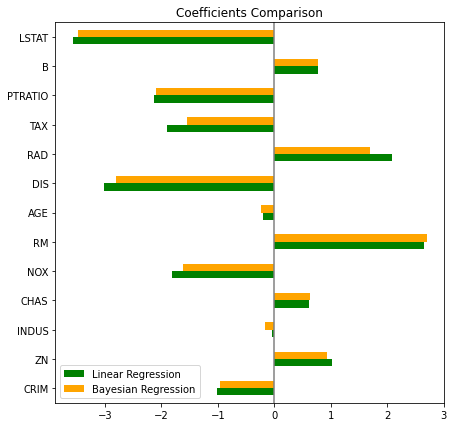

In [ ]:
coeftable=pd.concat([coefs_lr,coefs_bayes],axis=1)
coeftable.columns=['Linear Regression', 'Bayesian Regression']
coeftable.plot(kind='barh', figsize=(9, 7),color=['green','orange'])
plt.title('Coefficients Comparison')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

### Kernel Ridge Regression

source: https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html

Automatically created module for IPython interactive environment
Mean squared error: 597.61
Coefficient of determination: -6.31


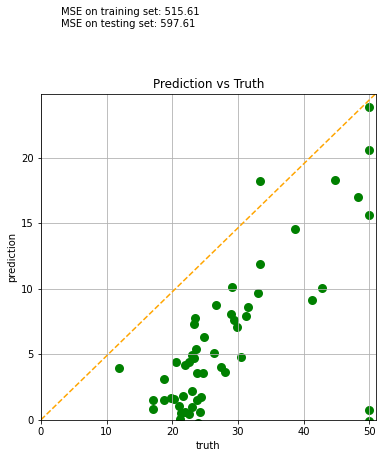

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge

# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr = KernelRidge()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test[:50], y_test[:50],  color='black')

y_pred = regr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
string_score = f'MSE on training set: {mse:.2f}'
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
string_score += f'\nMSE on testing set: {mse:.2f}'


fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(y_test[:500], y_pred[:500], color='green', linewidth=3)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="orange")
plt.text(3, 30, string_score)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('prediction')
plt.xlabel('truth')
plt.title('Prediction vs Truth')

plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_pred)+1])
plt.grid(True)


plt.show()


### Support Vector Machines

source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

Automatically created module for IPython interactive environment
Mean squared error: 40.12
Coefficient of determination: 0.51


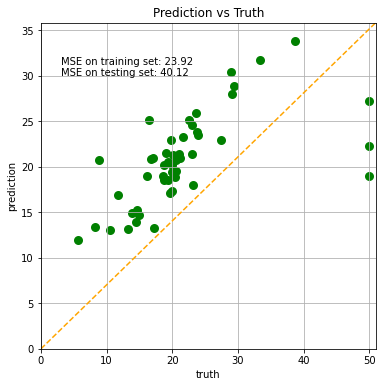

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,svm
from sklearn.metrics import mean_squared_error, r2_score


# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr = svm.SVR()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test[:50], y_test[:50],  color='black')

y_pred = regr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
string_score = f'MSE on training set: {mse:.2f}'
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
string_score += f'\nMSE on testing set: {mse:.2f}'


fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(y_test[:50], y_pred[:50], color='green', linewidth=3)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="orange")
plt.text(3, 30, string_score)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('prediction')
plt.xlabel('truth')
plt.title('Prediction vs Truth')

plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_pred)+1])
plt.grid(True)


plt.show()




### KNN Regression

source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

Automatically created module for IPython interactive environment
Mean squared error: 31.60
Coefficient of determination: 0.61


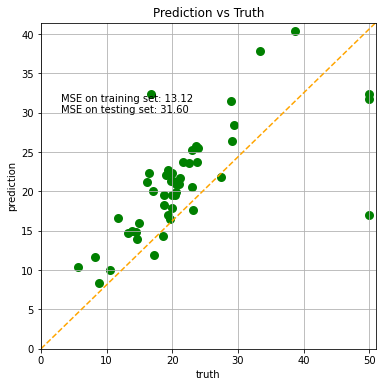

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, neighbors
from sklearn.metrics import mean_squared_error, r2_score



# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr =neighbors.KNeighborsRegressor()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test[:50], y_test[:50],  color='black')

y_pred = regr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
string_score = f'MSE on training set: {mse:.2f}'
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
string_score += f'\nMSE on testing set: {mse:.2f}'


fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(y_test[:50], y_pred[:50], color='green', linewidth=3)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="orange")
plt.text(3, 30, string_score)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('prediction')
plt.xlabel('truth')
plt.title('Prediction vs Truth')

plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_pred)+1])
plt.grid(True)


plt.show()



### Feature Selection

#### Forward Selection (LARS Regression)

Automatically created module for IPython interactive environment
Mean squared error: 29.78
Coefficient of determination: 0.64


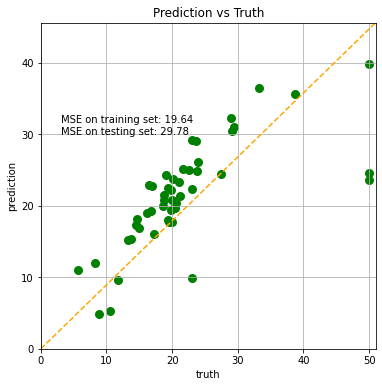

Computing regularization path using the LARS ...
.

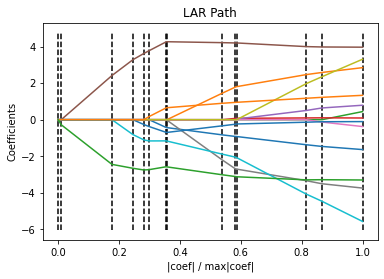

.

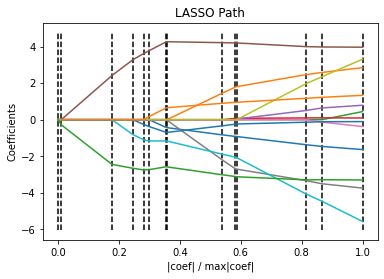

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, neighbors
from sklearn.metrics import mean_squared_error, r2_score



# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr =linear_model.Lars()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test[:50], y_test[:50],  color='black')

y_pred = regr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
string_score = f'MSE on training set: {mse:.2f}'
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
string_score += f'\nMSE on testing set: {mse:.2f}'


fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(y_test[:50], y_pred[:50], color='green', linewidth=3)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="orange")
plt.text(3, 30, string_score)

#plt.xticks(())
#plt.yticks(())

plt.ylabel('prediction')
plt.xlabel('truth')
plt.title('Prediction vs Truth')

plt.xlim([0, max(y_test)+1])
plt.ylim([0, max(y_pred)+1])
plt.grid(True)


plt.show()


print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X_train, y_train, method='lar', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LAR Path')
plt.axis('tight')
plt.show()

_, _, coefs = linear_model.lars_path(X_train, y_train, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()


In [ ]:
pd.DataFrame(data=coefs.T[5],index=housingdata.feature_names,columns=['parameter'])

,parameter
CRIM,0.000000
ZN,0.000000
INDUS,0.000000
CHAS,0.000000
NOX,0.000000
RM,3.773828
AGE,0.000000
DIS,0.000000
RAD,0.000000
TAX,-1.161784


####Feature Based on Importance

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

from sklearn.feature_selection import SelectFromModel
from time import time

importance = np.abs(regr.coef_)

threshold = np.sort(importance)[-6] + 0.01

tic = time()
sfm = SelectFromModel(regr, threshold=threshold).fit(X_train, y_train)
toc = time()
print("Features selected by SelectFromModel: "
      f"{housingdata.feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")



Automatically created module for IPython interactive environment
Coefficients: 
 [-1.01170421  1.02558108 -0.03953238  0.60731239 -1.80467996  2.64552328
 -0.19783648 -3.018615    2.0883816  -1.90212879 -2.13154559  0.77017134
 -3.56070005]
Mean squared error: 29.78
Coefficient of determination: 0.64
Features selected by SelectFromModel: ['RM' 'DIS' 'RAD' 'PTRATIO' 'LSTAT']
Done in 0.001s


#### Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))




selector = RFE(regr, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selector.support_

Automatically created module for IPython interactive environment
Coefficients: 
 [-1.01170421  1.02558108 -0.03953238  0.60731239 -1.80467996  2.64552328
 -0.19783648 -3.018615    2.0883816  -1.90212879 -2.13154559  0.77017134
 -3.56070005]
Mean squared error: 29.78
Coefficient of determination: 0.64


array([False, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True])

#### Tree-based Feature Selection 

Automatically created module for IPython interactive environment
Mean squared error: 16.12
Coefficient of determination: 0.80


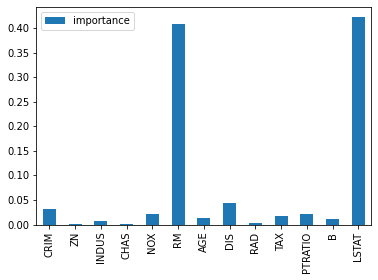

In [ ]:
from sklearn.ensemble import RandomForestRegressor
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the data dataset
data_X, data_y = datasets.load_boston(return_X_y=True)

scaler = StandardScaler()

scaler.fit(data_X)

data_X=scaler.transform(data_X)


# Use only one feature
#data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, random_state=0)

#data_X_train = data_X[:-20]
#data_X_test = data_X[-20:]

# Split the targets into training/testing sets
#data_y_train = data_y[:-20]
#data_y_test = data_y[-20:]

# Create linear regression object
regr = RandomForestRegressor()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

feature_importances_df=pd.DataFrame(data=regr.feature_importances_,index=housingdata.feature_names,columns=['importance'])

feature_importances_df.plot(kind="bar")
